In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Improving_Your_Data_Visualizations_in_Python/datasets/'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load the dataset
data_path = path_data + 'markets.csv'
markets = pd.read_csv(data_path).drop(columns = ['Unnamed: 0'])
markets.head(2)

,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,Cheese,...,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,num_items_sold,state_pop
0,Delano Community Farmers Market,Delano,Sedgwick,Kansas,-97.346623,37.68166,6,1,0,0,...,0,0,0,0,0,1,0,0,11,2904021.0
1,Fostoria Farmers' Market,Fostoria,Seneca,Ohio,-83.415410,41.15641,5,1,0,0,...,1,0,1,0,0,1,0,0,11,11594163.0


In [3]:
# exercise 01

"""
Looking at the farmers market data

Loaded is a new dataset, markets. Each row of this DataFrame belongs to an individual farmers market in the continental United States with various information about the market contained in the columns. In this exercise, explore the columns of the data to get familiar with them for future analysis and plotting.

As a first step, print out the first three lines of markets to get an idea of what type of data the columns encode. Then look at the summary descriptions of all of the columns. Since there are so many columns in the DataFrame, you'll want to turn the results 'sideways' by transposing the output to avoid cutting off rows.
"""

# Instructions

"""

    Print the first three rows of the data and transpose by chaining the .transpose() method to the DataFrame.
    Print the basic description of every column along with its median (which is already specified for you with the percentiles argument) and again chain the .transpose() method.

"""

# solution

# Print first three rows of data and transpose
first_rows = markets.head(3).transpose()
print(first_rows)

# Get descriptions of every column
col_descriptions = markets.describe(include = 'all',
                                percentiles = [0.5]).transpose()
print(col_descriptions)

#----------------------------------#

# Conclusion

"""
Great! It may seem boring, but these preliminary explorations of your data help set up the foundations of a successful data science project. Now that you've investigated the data, you can see that it is very "wide" – with many columns corresponding to the different goods sold. The goods are encoded with 1s and 0s that indicate whether the market sells the good or not.
"""

                                              0                         1   
name            Delano Community Farmers Market  Fostoria Farmers' Market  \
city                                     Delano                  Fostoria   
county                                 Sedgwick                    Seneca   
state                                    Kansas                      Ohio   
lat                                  -97.346623                 -83.41541   
lon                                    37.68166                  41.15641   
months_open                                   6                         5   
Bakedgoods                                    1                         1   
Beans                                         0                         0   
Cheese                                        0                         0   
Coffee                                        0                         0   
Crafts                                        1                         1   

'\nGreat! It may seem boring, but these preliminary explorations of your data help set up the foundations of a successful data science project. Now that you\'ve investigated the data, you can see that it is very "wide" – with many columns corresponding to the different goods sold. The goods are encoded with 1s and 0s that indicate whether the market sells the good or not.\n'

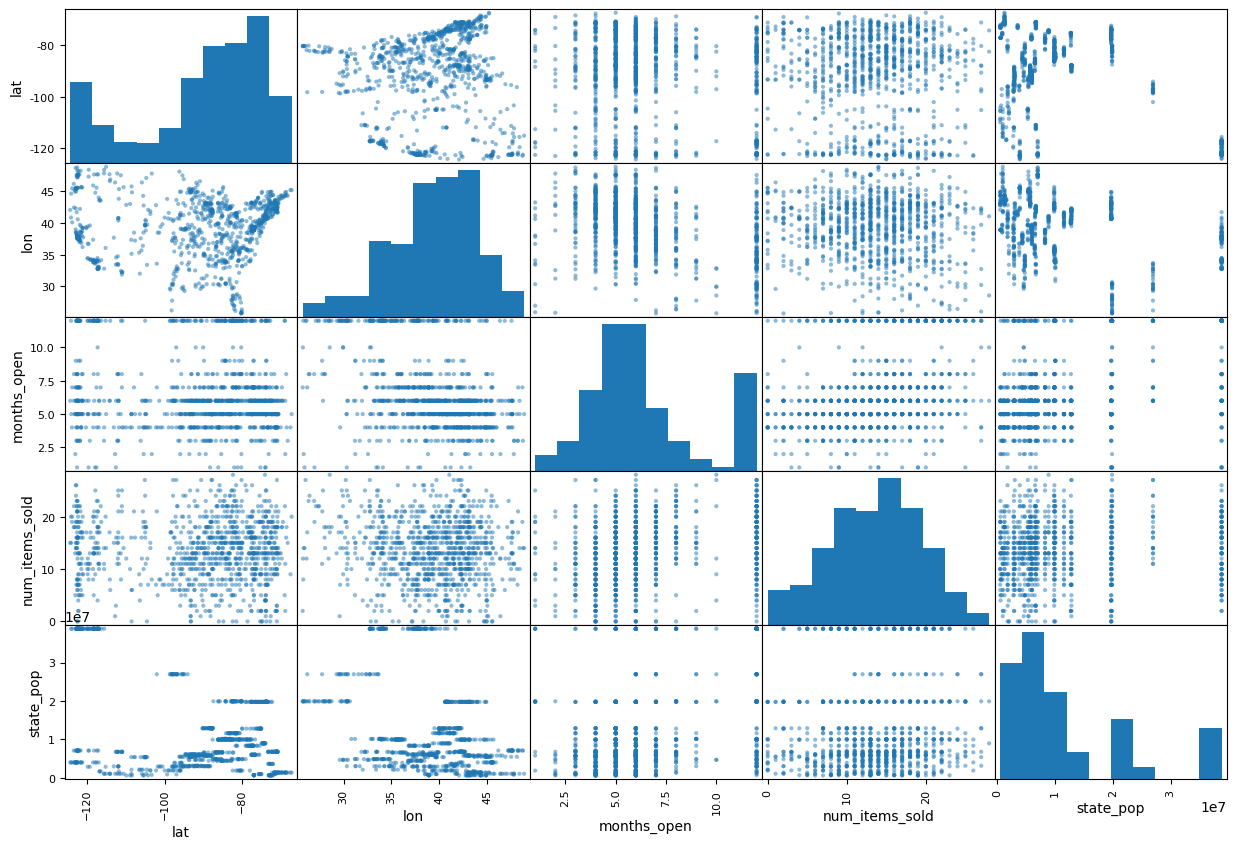

"\nGreat! Scatter matrices can be a lot of information to take in but are super helpful exploration tools. In this plot, we see that, due to many of the variables taking integers values (e.g., days of the week = 1,2,3,...), there is a lot of 'banding' with points clustering in a line along a given axis. Also, you will likely want to log-transform the population values as the distribution is highly skewed.\n"

In [4]:
# exercise 02

"""
Scatter matrix of numeric columns

You've investigated the new farmer's market data, and it's rather wide – with lots of columns of information for each market's row. Rather than painstakingly going through every combination of numeric columns and making a scatter plot to look at correlations, you decide to make a scatter matrix using the pandas built-in function.

Increasing the figure size with the figsize argument will help give the dense visualization some breathing room. Since there will be a lot of overlap for the points, decreasing the point opacity will help show the density of these overlaps.
"""

# Instructions

"""

    Subset the columns of the markets DataFrame to numeric_columns so the scatter matrix only shows numeric non-binary columns.
    Increase figure size to 15 by 10 to avoid crowding.
    Reduce point opacity to 50% to show regions of overlap.

"""

# solution

# Select just the numeric columns (exluding individual goods)
numeric_columns = ['lat', 'lon', 'months_open', 'num_items_sold', 'state_pop']

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns], 
                             # Make figure large to show details
                             figsize = (15,10), 
                           # Lower point opacity to show overlap
                           alpha = 0.5)

plt.show()

#----------------------------------#

# Conclusion

"""
Great! Scatter matrices can be a lot of information to take in but are super helpful exploration tools. In this plot, we see that, due to many of the variables taking integers values (e.g., days of the week = 1,2,3,...), there is a lot of 'banding' with points clustering in a line along a given axis. Also, you will likely want to log-transform the population values as the distribution is highly skewed.
"""

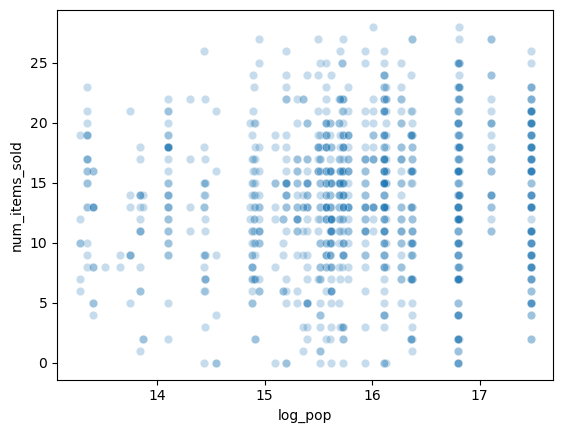

"\nWonderful! This plot shows you that even after transforming the population to remove skew and lowering the opacity it's hard to see if there's any relationship between the population and number of items sold.\n\nIn the next lesson, you'll look into more sophisticated ways to visually explore these patterns.\n"

In [5]:
# exercise 03

"""
Digging in with basic transforms

You are curious to see if the population of a state correlates to the number of items sold at farmer's markets. To check this, take the log of the population and draw a scatter plot against the number of items sold by a market. From your previous explorations of the dataset, you know there will be a lot of overlap, so to get a better handle on the patterns you want to reduce the marker opacity.
"""

# Instructions

"""

    Use numpy (imported as np) to create a new column: log_pop by taking the log of the state population.
    Pass this newly created logged column to the scatter plot function's x-mapping.
    Set the scatter plot's opacity to 25% to show overlap.

"""

# solution

# Create a new logged population column 
markets['log_pop'] = np.log(markets['state_pop'])

# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x = 'log_pop', 
                  y = 'num_items_sold', 
                  # Reduce point opacity to show overlap
                  alpha = 0.25, 
                  data = markets)

plt.show()

#----------------------------------#

# Conclusion

"""
Wonderful! This plot shows you that even after transforming the population to remove skew and lowering the opacity it's hard to see if there's any relationship between the population and number of items sold.

In the next lesson, you'll look into more sophisticated ways to visually explore these patterns.
"""

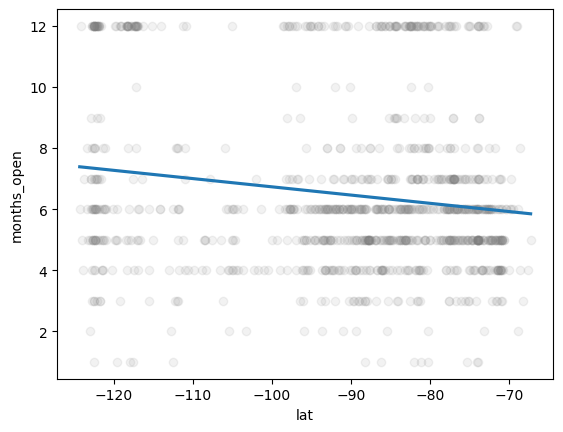

"\nGreat job! Here you see that underneath all the overlapping points there may be a negative relationship between a market's latitude and the number of months it's open. While you would never take these results and call the relationship true, you now have a path to dig into further to see if the signal is true or simply noise.\n"

In [6]:
# exercise 04

"""
Is latitude related to months open?

While exploring the farmers market dataset with a scatter matrix, you noticed a potentially interesting relationship between a market's latitude and the number of months it stays open. Digging into this relationship a bit further, you decide to use Seaborn's regression plot to see if there's any weight to this pattern or if the heavy overlap of the points is playing tricks on your eyes.

To make the regression line stand out, you'll want to lower the overlapping background points opacity and color them a muted gray. Since you're not going to be making any formal inference and want to quickly investigate a pattern, you can turn off the default uncertainty band.
"""

# Instructions

"""

    Set the scatter plot's points opacity to 10% and color them 'gray'.
    Disable the default confidence interval band.

"""

# solution

sns.regplot(x = 'lat', 
            y = 'months_open', 
            # Set scatter point opacity & color
            scatter_kws = {'alpha':0.1, 'color':'gray'}, 
            # Disable confidence band
            ci = False, 
            data = markets)

plt.show()

#----------------------------------#

# Conclusion

"""
Great job! Here you see that underneath all the overlapping points there may be a negative relationship between a market's latitude and the number of months it's open. While you would never take these results and call the relationship true, you now have a path to dig into further to see if the signal is true or simply noise.
"""

In [10]:
# creating the filtered data_frame
markets_and_pop = (markets
    .groupby('state', as_index = False)
    .agg({
       'name': lambda d: np.log(len(d)),
       'state_pop': lambda d: np.log(d.iloc[0]) })
    .rename(columns = {
        'name': 'log_markets', 
        'state_pop': 'log_pop' }))

markets_and_pop.head(3)

,state,log_markets,log_pop
0,Alabama,2.564949,15.394361
1,Arizona,2.397895,15.722306
2,Arkansas,2.302585,14.902849


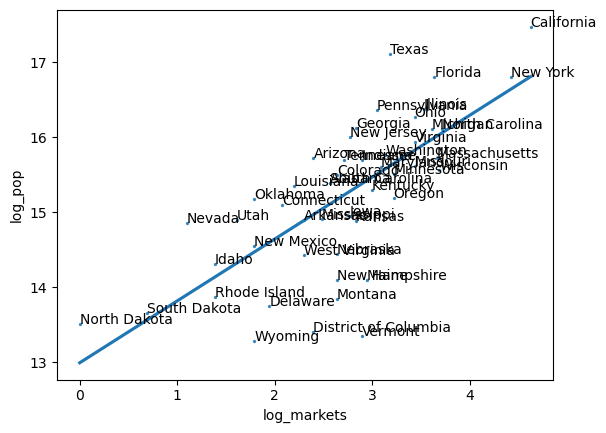

"\nWell done! The plot you've just made demonstrates how regression plots are not only great for revealing correlations in your data; they also can help you figure out what's out of the ordinary.\n\nHere you see that Vermont and Texas seem to be the largest outliers. With Vermont falling the furthest below the best-fit line and Texas the furthest above. Giving you an idea about what to investigate next.\n"

In [11]:
# exercise 05

"""
What state is the most market-friendly?

While exploring the farmer's market data, you wonder what patterns may show up if you aggregated to the state level. Are some states more market-friendly than other states? To investigate this, you group your data by state and get the log-transformed number of markets (log_markets) and state populations (log_pop).

markets_and_pop = (markets
    .groupby('state', as_index = False)
    .agg({
       'name': lambda d: log(len(d)),
       'state_pop': lambda d: log(d.iloc[0]) })
    .rename(columns = {
        'name': 'log_markets', 
        'state_pop': 'log_pop' }))

To visualize, you decide to use a regression plot to get an idea of the 'normal' relationship between market and population numbers and a text-scatter to quickly identify interesting outliers.
"""

# Instructions

"""

    Iterate over the rows of the markets_and_pop DataFrame.
    Place annotations next to their scatter plot points.
    Reduce annotation text size to 10 points.

"""

# solution

g = sns.regplot(
    x = "log_markets", y = "log_pop", 
    ci = False,
    # Shrink scatter plot points
    scatter_kws = {'s':2},
    data = markets_and_pop)

# Iterate over the rows of the data
for _, row in markets_and_pop.iterrows():
    state, log_markets, log_pop = row
    # Place annotation and reduce size for clarity
    g.annotate(state, (log_markets,log_pop), size = 10)

plt.show()

#----------------------------------#

# Conclusion

"""
Well done! The plot you've just made demonstrates how regression plots are not only great for revealing correlations in your data; they also can help you figure out what's out of the ordinary.

Here you see that Vermont and Texas seem to be the largest outliers. With Vermont falling the furthest below the best-fit line and Texas the furthest above. Giving you an idea about what to investigate next.
"""

In [35]:
# load goods_by_state
data_path = path_data + 'goods_by_state.csv'
goods_by_state = pd.read_csv(data_path)

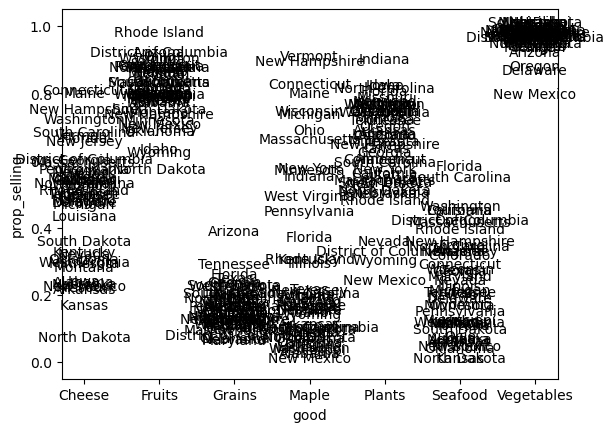

"\nGreat job! You are making some advanced plots now. While this plot may be very messy but also very interesting. You can see specific states rise above the rest, such as Arizona with grains, and other states like New Mexico consistently lag behind others in the availability of goods. This plot provides you with a lot of potential future avenues of exploration. In the coming exercises you'll explore some of these avenues.\n"

In [15]:
# exercise 06

"""
Popularity of goods sold by state

The farmer's market dataset contains columns corresponding to 28 different goods and whether or not they are sold at that market. You're curious to see if there are any interesting stories in this dataset regarding how likely you are to find a given good at a state's markets. To answer this question, you collapse the data into three columns:

    state - the name of the state
    good - the good of interest
    prop_selling - the proportion of markets in that state that sell that good

To quickly determine if patterns emerge, you choose a subset of goods you find interesting and decide to make a simple text-scatter: the good on the x-axis and the proportion of a state's markets that sell that good on the y-axis.
"""

# Instructions

"""


    Filter goods_by_state to the desired goods listed in to_plot.

    Hide the scatter plot points by setting their size to nothing.
        Note that in sns.scatterplot(), size is used to map values from a column to a size scale, and s is used to set a constant size for all points.

    Make the text center aligned, so it sits directly on the good's x-axis location.

"""

# solution

# Subset goods to interesting ones
to_plot = ['Cheese','Maple','Fruits','Grains','Seafood','Plants','Vegetables']
goods_by_state_small = goods_by_state.query("good in "+str(to_plot))

g = sns.scatterplot(x='good',y='prop_selling', data = goods_by_state_small,
                    # Hide scatter points by shrinking to nothing
                    s = 0)

for _,row in goods_by_state_small.iterrows():
  g.annotate(row['state'], (row['good'], row['prop_selling']), 
             # Center annotation on axis
             ha = 'center', 
             size = 10)

plt.show()

#----------------------------------#

# Conclusion

"""
Great job! You are making some advanced plots now. While this plot may be very messy but also very interesting. You can see specific states rise above the rest, such as Arizona with grains, and other states like New Mexico consistently lag behind others in the availability of goods. This plot provides you with a lot of potential future avenues of exploration. In the coming exercises you'll explore some of these avenues.
"""

/tmp/ipykernel_121900/652860776.py:27: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.scatterplot(y="lon", x="lat", hue = 'months_open',


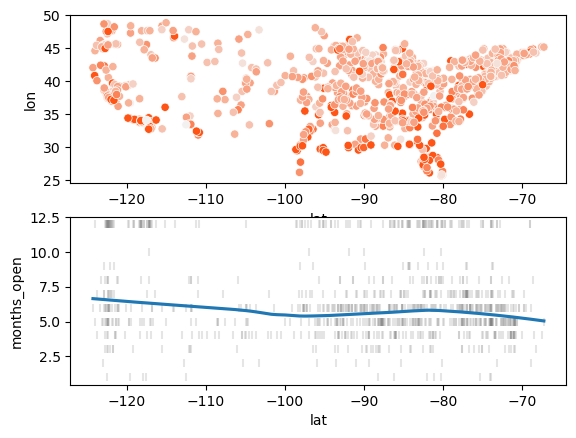

'\nGreat work! By stacking these two plots, you can tell a detailed story using little space. You have broad geographic trends on how long markets stay open in the top map plot. While below, the scatter focuses on patterns in longitude; showing detailed cross-country trends.\n\nNotice the slight bump around longitude -80? What region of the country seems to be causing this?\n'

In [22]:
# exercise 07

"""
Stacking to find trends

In the farmers market dataset, you are interested in the number of months that a market stays open in relation to its geography, more specifically its longitude. You're curious to see if there are any regions of the country that behave noticeably different from the others.

To do this, you create a basic map with a scatter plot of the latitude and longitude of each market, coloring each market by the number of months it's open. Further digging into the latitude relationship, you draw a regression plot of the latitude to the number of months open with a flexible fit line to determine if any trends appear. You want to view these simultaneously to get the clearest picture of the trends.
"""

# Instructions

"""

    Set up plt.subplots() to have two vertically stacked plots.
    Assign the first (top) plot to the lon, lat scatter plot.
    Assign the second (bottom) plot to the lon to months_open regression plot.

"""

# solution

# Setup two stacked plots
_, (ax1, ax2) = plt.subplots(2, 1)

# Draw location scatter plot on first plot
sns.scatterplot(y="lon", x="lat", hue = 'months_open',  
                palette = sns.light_palette("orangered",n_colors = 12), 
                legend = False, data = markets,
                ax = ax1);

# Plot a regression plot on second plot
sns.regplot(x='lat', y='months_open',
            scatter_kws = {'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess = True,
            marker = '|', data = markets, 
            ax = ax2)

plt.show()

#----------------------------------#

# Conclusion

"""
Great work! By stacking these two plots, you can tell a detailed story using little space. You have broad geographic trends on how long markets stay open in the top map plot. While below, the scatter focuses on patterns in longitude; showing detailed cross-country trends.

Notice the slight bump around longitude -80? What region of the country seems to be causing this?
"""

In [24]:
# load markets_by_state
data_path = path_data + 'markers_by_state.csv'
markets_by_state = pd.read_csv(data_path)

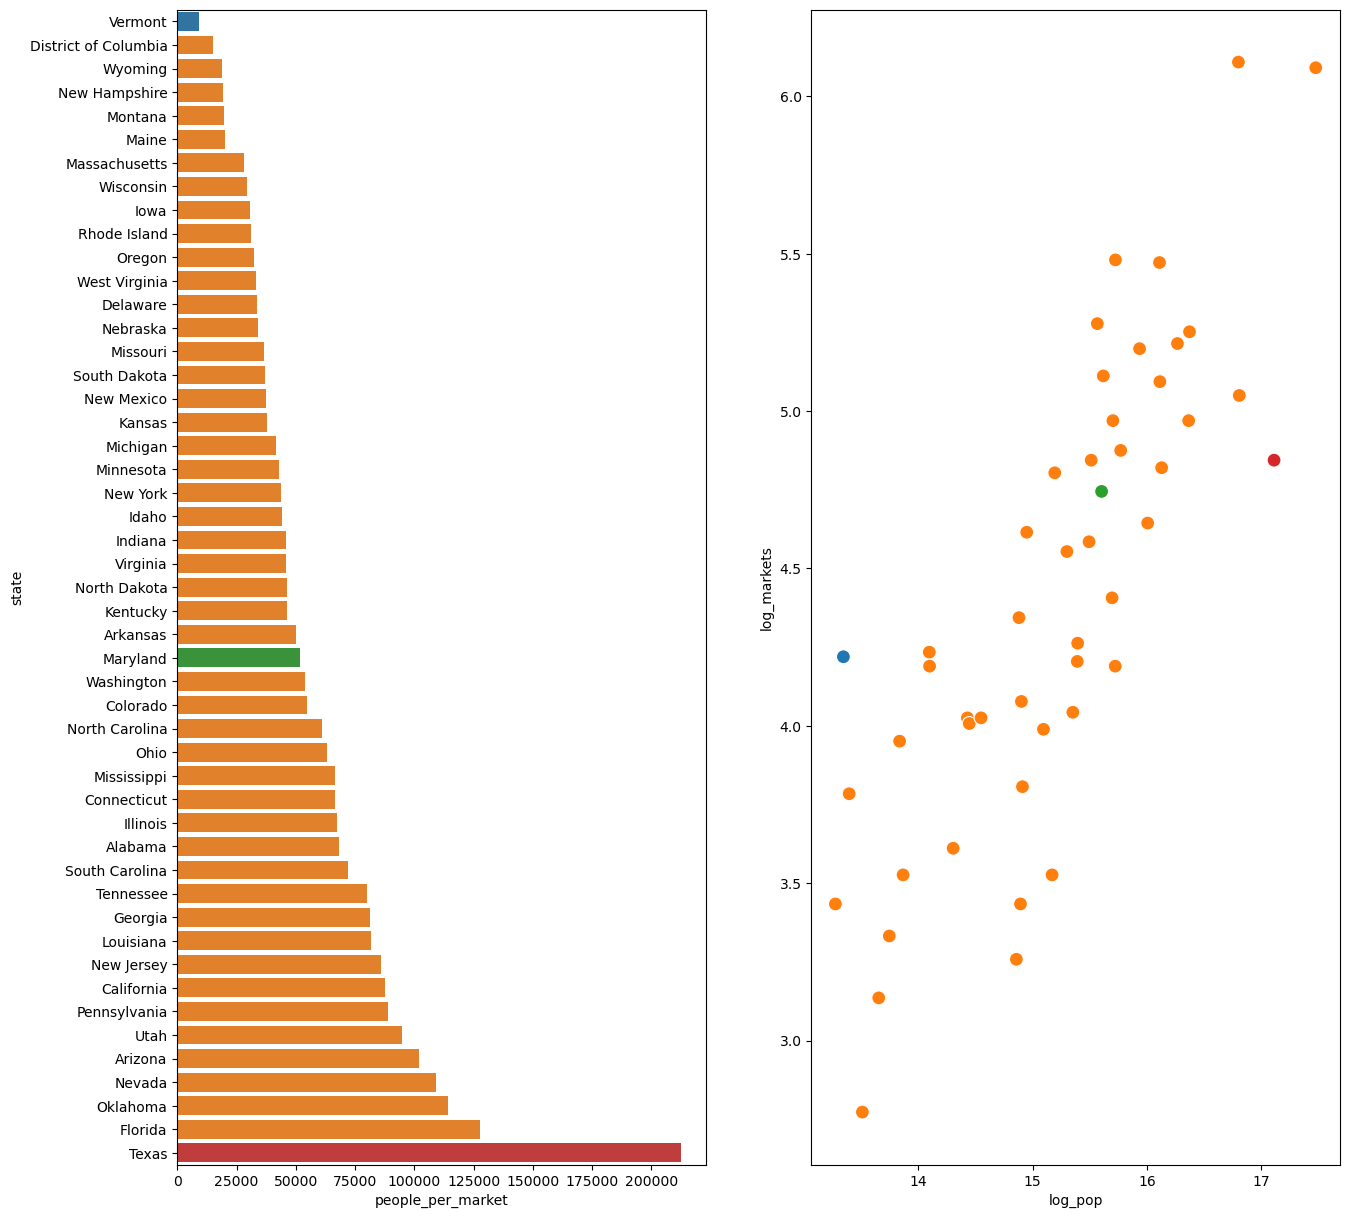

'\nGreat work! By making double use of the bar chart as a legend, you have made a very efficient and information-dense data visualization. Always be on the lookout for how you can embed your legend into the plot to make the visualization intuitive and clean.\n'

In [25]:
# exercise 08

"""
Using a plot as a legend

One interesting thread of investigation in the farmer's market data is a state's "market friendliness" and specifically, the outliers. One way to look at this is by using the ratio of farmer's markets to people by state. You could directly look at the ratio; however, a ratio throws away the raw information about a state's population and the number of markets. A large state with a high ratio could be more interesting than a small one.

You can show both the ratio and raw numbers by drawing two plots, one of the ratio and the other of the market number to population scatter plot. To help simplify your now dense visualization, you can use the bar plot as a legend; calling out interesting states by matching the colors of their bars and scatter points.
"""

# Instructions

"""

    Set up two plots side-by-side using plt.subplots().
    Map the column is_selected to the color of both the bar and scatter plot.
    Disable dodge on the bar plot, so the bars are full height.
    Remove the legends in both plots.

"""

# solution

# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

# Map the column for selected states to the bar color
sns.barplot(x='people_per_market', y='state', hue = 'is_selected',
            # Disable dodge so bars are full size
            dodge = False, 
            data = markets_by_state, ax = ax1)

# Map selected states to point color
sns.scatterplot(x='log_pop', y='log_markets', hue = 'is_selected', 
                data = markets_by_state, ax = ax2, s = 100)

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove() 
plt.show() 

#----------------------------------#

# Conclusion

"""
Great work! By making double use of the bar chart as a legend, you have made a very efficient and information-dense data visualization. Always be on the lookout for how you can embed your legend into the plot to make the visualization intuitive and clean.
"""

In [40]:
#goods_by_state = goods_by_state.drop(columns=['Unnamed: 0'])
goods_by_state

,state,good,prop_selling
0,Alabama,Bakedgoods,0.760563
1,Alabama,Beans,0.084507
2,Alabama,Cheese,0.225352
3,Alabama,Coffee,0.197183
4,Alabama,Crafts,0.422535
...,...,...,...
1416,Wyoming,Tofu,0.000000
1417,Wyoming,Trees,0.129032
1418,Wyoming,Vegetables,0.935484
1419,Wyoming,WildHarvested,0.096774


In [ ]:
# exercise 09

"""
Cleaning up the background

While exploring state-level patterns in goods sold at farmer's markets, a few states stood out to you. North Dakota and New Mexico routinely fell near the bottom of the states regarding their proportion of farmer's markets selling a given good. Whereas Vermont was always near the top. You want to present the general patterns in good sales by state, while also highlighting the states you found interesting.

You make a scatter plot of goods being sold by the proportion of markets that sell that good in a state. To highlight the interesting states, you draw a line between each of the state's points. To make a clean and minimal plot, you reduce the background to a simple set of orienting grids.
"""

# Instructions

"""

    Set the background of the plot to be white with gridlines.
    Encode the x and y-axes of the scatter and line plots with the 'good' being sold and 'prop selling', respectively.
    Remove all of the borders from the plot. Remember, by default, sns.despine() only removes the top and right border lines (spines)!

"""

# solution

# Set background to white with grid
sns.set_style('whitegrid')

plt.scatter(x='good',y='prop selling', marker = '_', alpha = 0.7, data = goods_by_state)

# Draw lines across goods for highlighted states
highlighted = goods_by_state.query("state in ['New Mexico','North Dakota','Vermont']")
sns.lineplot(x='good',y='prop selling', hue='state', data = highlighted, legend = False)

# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index = False).agg('first')
for _,row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop selling']),
                 ha = 'right', xytext = (5,0), textcoords = 'offset pixels')

# Remove all borders
sns.despine(left = True, bottom = True)
plt.show()

#----------------------------------#

# Conclusion

"""
Wonderful -- by making these simple tweaks, you've made a plot that is easier to read and much cleaner looking! Pairing these tweaks with text at the end of the highlighted lines and removing the borders creates a polished and interesting plot.
"""

In [45]:
# load markets_by_month
data_path = path_data + 'markets_by_month.csv'
markets_by_month = pd.read_csv(data_path)
state_by_lat = ['North Dakota', 'Washington', 'Montana', 'Minnesota', 'Oregon', 'Idaho', 'Maine', 'South Dakota', 'Vermont', 'Wisconsin', 'Michigan', 'New Hampshire', 'Wyoming', 'Massachusetts', 'New York',
       'Iowa', 'Rhode Island', 'Connecticut', 'Nebraska', 'Illinois', 'Ohio', 'New Jersey', 'Pennsylvania', 'Indiana', 'Utah', 'Colorado', 'Delaware', 'Maryland', 'West Virginia',
       'District of Columbia', 'Kansas', 'Nevada', 'Missouri', 'Virginia', 'Kentucky', 'California', 'Tennessee', 'Oklahoma', 'North Carolina', 'Arkansas', 'New Mexico', 'South Carolina', 'Georgia',
       'Arizona', 'Alabama', 'Mississippi', 'Texas', 'Louisiana', 'Florida']

In [ ]:
# exercise 10

"""
Remixing a plot

You find the relationship between the latitude of a farmer's market and the number of months the market was open fascinating. Intuitively as one gets further South, the growing seasons are longer, and thus the markets can stay open longer. To visualize this story, you summarize the market data at the state level and draw a heatmap with columns corresponding to the duration the markets are open. Each row in the heatmap shows the distribution of the market "season" for a state and rows are sorted in descending order of the state's latitude.

heatmap

The default heatmap leaves a lot to be desired. Decrease the font size to allow each state name to fit without overlap. The dark color palette also clashes with the light background, and the colorbar doesn't help the reader as the point is relative comparisons.
"""

# Instructions

"""

    Decrease the font size to 85% of the default to un-crowd state names.
    Make new color palette that goes from 'white' to 'steelblue'.
    Replace the default palette with the newly created one.
    Remove the continuous color bar legend drawn next to heatmap.

"""

# solution

# Decrease font size so state names are less crowded
sns.set(font_scale = 0.85)

# Switch to an appropriate color palette
blue_pal = sns.light_palette('steelblue', as_cmap = True)

# Order states by latitude
g = sns.heatmap(markets_by_month.reindex(state_by_lat), 
            # Add gaps between cells
            linewidths = 0.1, 
            # Set new palette and remove color bar 
            cmap = blue_pal, cbar = False,
            yticklabels = True)

# Rotate y-axis ticks 
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.title('Distribution of months open for farmers markets by latitude')
plt.show()

#----------------------------------#

# Conclusion

"""
Fantastic job! By making a few minor tweaks to the style of this plot you've made it much more presentable and attractive than it started! The trend of markets staying open for more of the year in southern states is reflected clearly, and the detailed axes allow readers to dig in and find their own stories in the data.
"""

In [ ]:
# exercise 11

"""
Enhancing legibility

You and your colleagues have decided that the most important aspect of the data you want to show is the differences between the most "market-friendly" state, Vermont, and the least, Texas. To do this, put two plots side by side – a barplot showing the number of people per farmer's market in the state and a scatter plot showing the population on the x-axis and the number of markets on the y-axis.

Emphasize your findings by calling out Vermont and Texas by assigning them distinct colors. Also, provide a large and easy to read annotation for Texas.

Supplied is a vector state_colors that assigns Vermont and Texas unique colors and all other states gray along with the annotation describing Texas, tx_message.
"""

# Instructions

"""

    Map the supplied color vector state_colors to the bar plot (ax1) with the palette argument in sns.barplot().
    Map the color vector to the scatter plot points with the c argument.
    Make sure annotation text is legible by changing its size to 15.

"""

# solution

# Draw barplot w/ colors mapped to state_colors vector
sns.barplot('people_per_market', 'state', palette = state_colors,
            data = markets_by_state, ax = ax1)

# Map state colors vector to the scatterplot as well
p = sns.scatterplot('population', 'num_markets', c = state_colors,
                    data = markets_by_state, s = 60, ax = ax2)

# Log the x and y scales of our scatter plot so it's easier to read
ax2.set(xscale = "log", yscale = 'log')

# Increase annotation text size for legibility
ax2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450),ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')
plt.show()

#----------------------------------#

# Conclusion

"""
Congratulations! In this rather advanced plot, the viewer has their eyes guided by the colors to two important states. The annotation helps guide the exploration of the plot; showing Texas and Vermont fall on both ends of the spectrum for both state size and people-per-market.

By providing two different views of the data with the bar and scatter and linking two important values between the plots using subtle color cues, your visualization instantly becomes more approachable.
"""